In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [3]:
# 2. Load and Prepare the Dataset
# Load the Heart Disease UCI dataset and handle the categorical 'thal' column using one-hot encoding.
url = 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv'
df = pd.read_csv(url)
# Handle the categorical 'thal' column
if 'thal' in df.columns:
    if df['thal'].dtype == 'object':
        mode_val = df['thal'].mode()[0]
        df['thal'] = df['thal'].replace('?', mode_val)
    df = pd.get_dummies(df, columns=['thal'], drop_first=True)

In [5]:
## 3. Exploratory Data Analysis (EDA)
#Display the first few rows, dataset info, and check for missing values.

print("First 5 rows of the dataset after encoding 'thal':")
display(df.head())
print("\nDataset Info:")
df.info()
print("\nChecking for missing values:")
print(df.isnull().sum())

First 5 rows of the dataset after encoding 'thal':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,False,True,False,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3,1,False,False,True,False
2,67,1,4,120,229,0,2,129,1,2.6,2,2,0,False,False,False,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,False,False,True,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,False,False,True,False



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   cp               303 non-null    int64  
 3   trestbps         303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fbs              303 non-null    int64  
 6   restecg          303 non-null    int64  
 7   thalach          303 non-null    int64  
 8   exang            303 non-null    int64  
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    int64  
 11  ca               303 non-null    int64  
 12  target           303 non-null    int64  
 13  thal_2           303 non-null    bool   
 14  thal_fixed       303 non-null    bool   
 15  thal_normal      303 non-null    bool   
 16  thal_reversible  303 non-null    bool   
dtypes

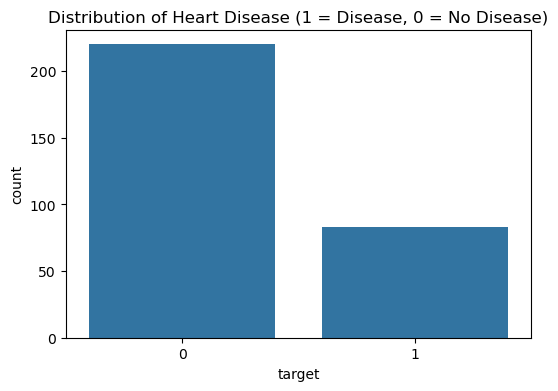

In [7]:
### Visualize the Distribution of the Target Variable

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.show()

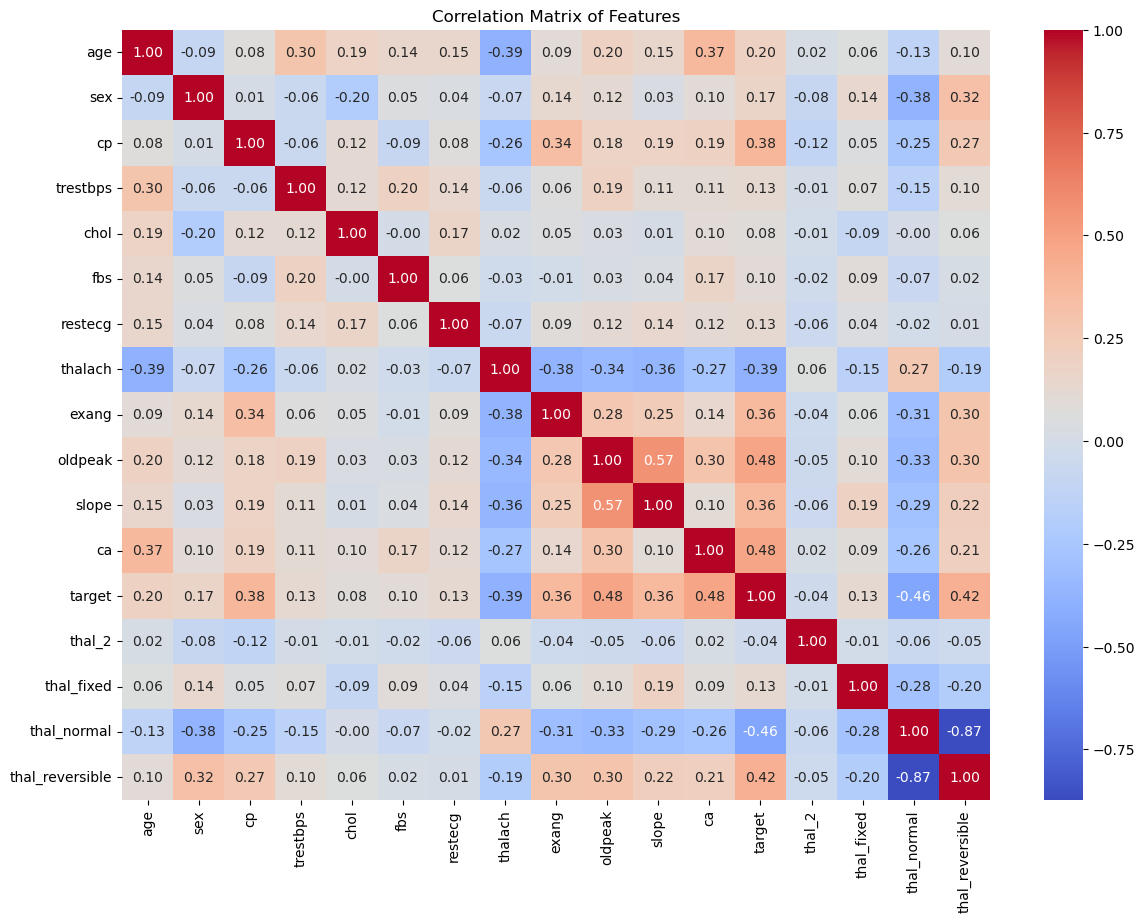

In [9]:
### Visualize the Correlation Matrix

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [11]:
## 4. Data Preparation
#Split the data into features (X) and target (y), then into training and testing sets.

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
## 5. Train a Decision Tree Classifier
#Fit a Decision Tree model to the training data.

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


Model Accuracy: 0.7377


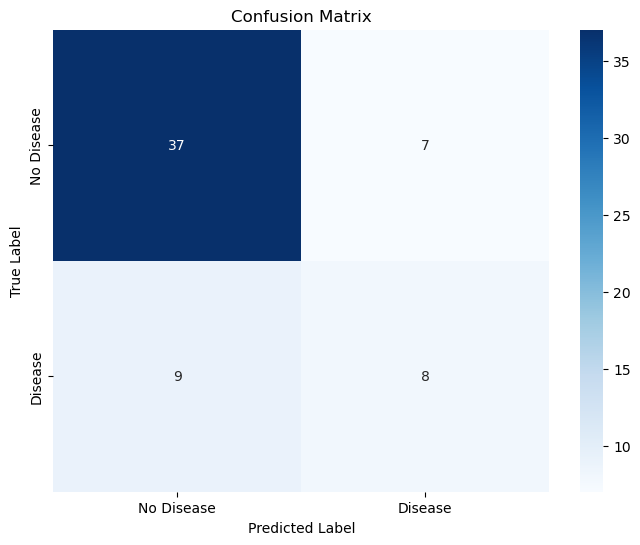

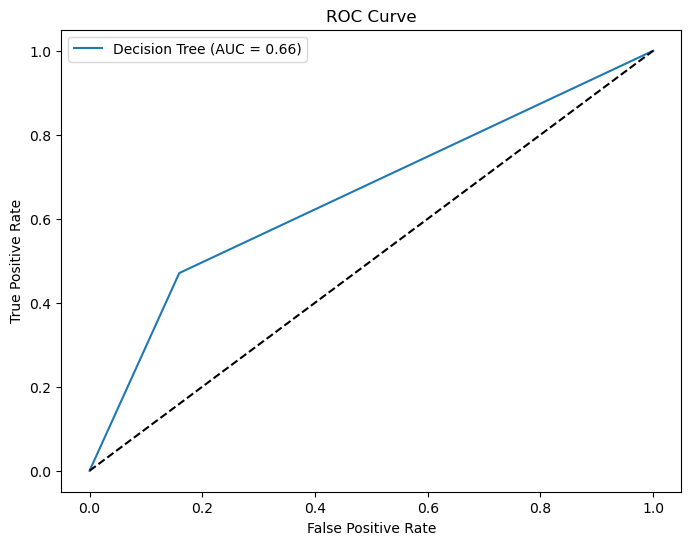

AUC Score: 0.6557


In [15]:
## 6. Evaluate the Model
#Calculate accuracy, display the confusion matrix, and plot the ROC curve.

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(f'AUC Score: {auc_score:.4f}')